In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import scipy.stats as sts
# import quandl
import os
import numpy as np
from scipy import stats
from scipy.stats import linregress
from scipy.stats import pearsonr
import seaborn as sn

## Importing the data from the Main Final Data Frame

In [2]:
market_data_df = pd.read_csv('Final_Model_df.csv')

In [3]:
del market_data_df['Unnamed: 0']

In [4]:
market_data_df.rename(columns={'Closing_Price':'SP500_Price','Daily_Return':'SP500_Return' }, inplace=True)

In [5]:
market_data_df.to_csv('Final_Model_df.csv')

## Correlation Matrix

In [6]:
CorrMatrix = market_data_df.corr()

In [7]:
CorrMatrix

SP500_Price  SP500_Return  20-day_Vol  50-day_Vol  \
SP500_Price             1.000000      0.030711   -0.234656   -0.243494   
SP500_Return            0.030711      1.000000   -0.004963   -0.006154   
20-day_Vol             -0.234656     -0.004963    1.000000    0.882350   
50-day_Vol             -0.243494     -0.006154    0.882350    1.000000   
100-day_Vol            -0.280522     -0.008256    0.752582    0.897964   
...                          ...           ...         ...         ...   
EM_Bonds_21-day_MA     -0.511910     -0.017945    0.614135    0.719577   
EM_Bonds_55-day_MA     -0.521608     -0.014896    0.522201    0.648235   
EM_Bonds_100-day_MA    -0.541961     -0.009910    0.460298    0.561613   
Value                  -0.152120     -0.050249    0.516327    0.481279   
Ted_Spread_Return      -0.000101     -0.040236    0.011852   -0.002253   

                     100-day_Vol  21-day_MA  55-day_MA  100-day_MA    Nikkei  \
SP500_Price            -0.280522   0.997053   0.992815    0.989502  0.868398   
SP500_Return           -0.008256   0.005104   0.006908    0.007767  0.006154   
20-day_Vol              0.752582  -0.216578  -0.167851   -0.135228 -0.248452   
50-day_Vol              0.897964  -0.236954  -0.202925   -0.158701 -0.271403   
100-day_Vol             1.000000  -0.277683  -0.259223   -0.223202 -0.316970   
...                          ...        ...        ...         ...       ...   
EM_Bonds_21-day_MA      0.795759  -0.509641  -0.494317   -0.470849 -0.427664   
EM_Bonds_55-day_MA      0.773284  -0.520855  -0.512901   -0.492118 -0.438571   
EM_Bonds_100-day_MA     0.713229  -0.541213  -0.535902   -0.521252 -0.462985   
Value                   0.409855  -0.140172  -0.115278   -0.095917 -0.000891   
Ted_Spread_Return      -0.001812   0.004156   0.004287    0.003708 -0.005383   

                     Nikkei_Returns  ...  EM_High_Yield  EM Returns  \
SP500_Price                0.016789  ...      -0.507980    0.007455   
SP500_Return               0.159534  ...      -0.023616   -0.168726   
20-day_Vol                -0.025578  ...       0.667679    0.100409   
50-day_Vol                -0.019715  ...       0.737754    0.020671   
100-day_Vol               -0.015703  ...       0.796422   -0.015298   
...                             ...  ...            ...         ...   
EM_Bonds_21-day_MA        -0.011420  ...       0.988828   -0.046034   
EM_Bonds_55-day_MA        -0.011696  ...       0.955378   -0.063303   
EM_Bonds_100-day_MA       -0.009723  ...       0.908290   -0.068569   
Value                     -0.044132  ...       0.404868    0.133263   
Ted_Spread_Return         -0.000226  ...      -0.002032   -0.008700   

                     EM_Bonds_20-day_Vol  EM_Bonds_50-day_Vol  \
SP500_Price                    -0.019712            -0.046770   
SP500_Return                    0.002225             0.004667   
20-day_Vol                      0.403627             0.417966   
50-day_Vol                      0.328233             0.467216   
100-day_Vol                     0.252945             0.374674   
...                                  ...                  ...   
EM_Bonds_21-day_MA              0.191639             0.274447   
EM_Bonds_55-day_MA              0.144431             0.237887   
EM_Bonds_100-day_MA             0.140963             0.211965   
Value                          -0.021968            -0.034917   
Ted_Spread_Return               0.016364             0.012017   

                     EM_Bonds_100-day_Vol  EM_Bonds_21-day_MA  \
SP500_Price                     -0.088743           -0.511910   
SP500_Return                     0.001880           -0.017945   
20-day_Vol                       0.375983            0.614135   
50-day_Vol                       0.456396            0.719577   
100-day_Vol                      0.486899            0.795759   
...                                   ...                 ...   
EM_Bonds_21-day_MA               0.332706            1.000000   
EM_Bonds_55-day_M

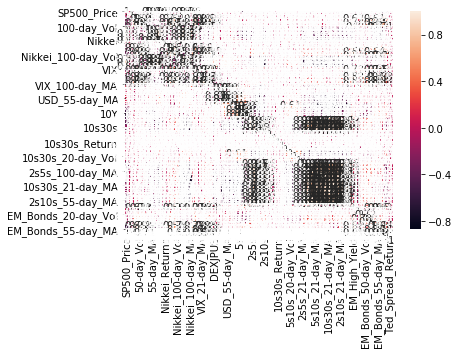

In [8]:
sn.heatmap(CorrMatrix, annot=True)
plt.show()

In [9]:
print(market_data_df['Nikkei'].corr(market_data_df['10Y']))

market_data_df['VIX'].corr(market_data_df['Nikkei'])


-0.14274582512092715


-0.37757204717415505

In [10]:
market_data_df.columns

Index(['Date', 'SP500_Price', 'SP500_Return', '20-day_Vol', '50-day_Vol',
       '100-day_Vol', '21-day_MA', '55-day_MA', '100-day_MA', 'Nikkei',
       'Nikkei_Returns', 'Nikkei_20-day_Vol', 'Nikkei_50-day_Vol',
       'Nikkei_100-day_Vol', 'Nikkei_21-day_MA', 'Nikkei_55-day_MA',
       'Nikkei_100-day_MA', 'VIX', 'VIX_Returns', 'VIX_21-day_MA',
       'VIX_55-day_MA', 'VIX_100-day_MA', 'DEXJPUS', 'USD/JPY_Returns',
       'USD_21-day_MA', 'USD_55-day_MA', 'USD_100-day_MA', '2Y', '5Y', '10Y',
       '30Y', '2s5s', '5s10s', '10s30s', '2s10s', '2s5s_Return',
       '5s10s_Return', '10s30s_Return', '2s10s_Return', '2s5s_20-day_Vol',
       '5s10s_20-day_Vol', '10s30s_20-day_Vol', '2s10s_20-day_Vol',
       '2s5s_21-day_MA', '2s5s_55-day_MA', '2s5s_100-day_MA',
       '5s10s_21-day_MA', '5s10s_55-day_MA', '5s10s_100-day_MA',
       '10s30s_21-day_MA', '10s30s_55-day_MA', '10s30s_100-day_MA',
       '2s10s_21-day_MA', '2s10s_55-day_MA', '2s10s_100-day_MA',
       'EM_High_Yield', 'EM Retur

## Splitting Training and Testing Data Sets

## Training data 

In [11]:
Training_Data_Set = market_data_df.loc[(market_data_df['Date']>='1999-01-04') & (market_data_df['Date']<='2018-01-04')]

## Saving Training Data to csv

In [12]:
Training_Data_Set.to_csv('Training_data.csv')

## Testing Data Set

In [13]:
Testing_Data_Set = market_data_df.loc[(market_data_df['Date']>='2018-01-04')] 

## Saving Testing Data to csv

In [14]:
Testing_Data_Set.to_csv('Testing_data.csv')

## Simple Multiple Linear Regression with Raw Data

In [15]:
# Dropping date for training set
Training_Data_Set = Training_Data_Set.drop(columns=['Date'])

In [16]:
Training_Data_Set

SP500_Price  SP500_Return  20-day_Vol  50-day_Vol  100-day_Vol  \
0         1241.75     -0.007394   20.959995   19.480055    29.752237   
1         1266.00      0.019529   20.644222   19.577022    29.824555   
2         1295.00      0.022907   21.726881   20.070303    29.850770   
3         1281.25     -0.010618   22.107907   20.236138    29.805115   
4         1296.00      0.011512   22.273337   20.257133    29.824544   
...           ...           ...         ...         ...          ...   
4410      2688.00     -0.000558    6.823078    5.763436     6.410536   
4411      2687.25     -0.000651    6.228003    5.777269     6.409528   
4412      2687.50      0.000093    6.220832    5.778712     6.406824   
4413      2678.00     -0.003535    5.738021    5.867188     6.429570   
4414      2726.25      0.004884    6.063388    5.988264     6.106502   

        21-day_MA    55-day_MA  100-day_MA    Nikkei  Nikkei_Returns  ...  \
0     1209.547619  1166.518182   1109.5925  13415.89       -0.031280  ...   
1     1214.380952  1170.027273   1111.5025  13232.74       -0.013746  ...   
2     1219.357143  1174.004545   1113.4725  13468.46        0.017657  ...   
3     1223.166667  1177.631818   1115.1100  13536.56        0.005044  ...   
4     1227.976190  1181.509091   1116.9575  13391.81       -0.010751  ...   
...           ...          ...         ...       ...             ...  ...   
4410  2654.142857  2602.640909   2545.7875  22902.76        0.001602  ...   
4411  2662.285714  2607.854545   2550.1525  22911.21        0.000809  ...   
4412  2665.142857  2610.377273   2552.2725  22783.98       -0.005569  ...   
4413  2667.571429  2612.645455   2554.3450  22764.94       -0.000836  ...   
4414  2676.988095  2621.281818   2562.2400  23506.33        0.032048  ...   

      EM_High_Yield  EM Returns  EM_Bonds_20-day_Vol  EM_Bonds_50-day_Vol  \
0             14.90   -0.001340                  NaN                  NaN   
1             14.89   -0.000671                  NaN                  NaN   
2             14.79   -0.006716                  NaN                  NaN   
3             14.78   -0.000676                  NaN                  NaN   
4             14.82    0.002706                  NaN                  NaN   
...             ...         ...                  ...                  ...   
4410           5.70   -0.001751             8.234791             8.162444   
4411           5.67   -0.003515             8.128106             8.161718   
4412           5.67    0.000000             7.378105             8.149840   
4413           5.66   -0.001764             4.119414             8.117274   
4414           5.31   -0.005618            15.920061            12.617890   

      EM_Bonds_100-day_Vol  EM_Bonds_21-day_MA  EM_Bonds_55-day_MA  \
0                      NaN                 NaN                 NaN   
1                      NaN                 NaN                 NaN   
2                      NaN                 NaN                 NaN   
3                      NaN                 NaN                 NaN   
4                      NaN                 NaN                 NaN   
...                    ...                 ...                 ...   
4410              7.150068            5.688571            5.715273   
4411              7.107786            5.682381            5.714727   
4412              7.050873            5.680000            5.714545   
4413              7.022355            5.674762            5.714545   
4414              9.665944            5.620476            5.694727   

      EM_Bonds_100-day_MA  Value  Ted_Spread_Return  
0                     NaN    0.7           0.000000  
1                     NaN    0.7           0.000000  
2                     NaN    0.7           0.000000  
3                     NaN    0.7           0.000000  
4                     NaN    0.7           0.000000  
...                   ...    ...                ...  
4410               5.8084    0.4           0.333333  
4411              

## Model Calibration - Training Set

In [17]:
X_train = Training_Data_Set[['SP500_Price','DEXJPUS','VIX','10Y']]                     

In [18]:
y_train = Training_Data_Set[['Nikkei']].values.reshape(-1,1)

## Model Calibration - Testing Set

In [19]:
X_test = Testing_Data_Set[['SP500_Price','DEXJPUS','VIX','10Y']]  

In [20]:
y_test = Testing_Data_Set[['Nikkei']].values.reshape(-1,1)

## Import Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

## Fitting and Training the model - Training/Testing Data

In [22]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8958441910578678
Testing Score: -5.754684711248196


In [23]:
score = model.score(X_test, y_test)
print(f"R2 Score: {score}")

R2 Score: -5.754684711248196


In [24]:
predictions = model.predict(X_train)

In [25]:
predictions

array([[13564.46716107],
       [13798.71386364],
       [14079.28807455],
       ...,
       [23612.70882916],
       [23494.53740251],
       [23997.27805392]])

## Training Data Set Actual vs Model

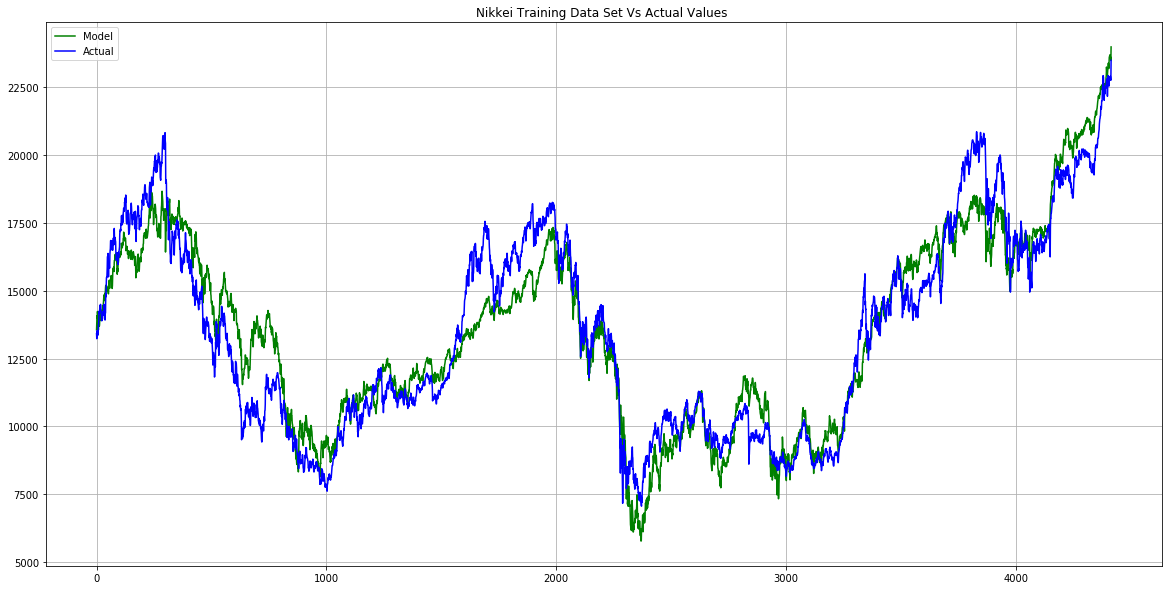

In [26]:
fig = plt.figure(figsize = (20,10))

plt.plot(predictions,'-g',label='Model')
plt.plot(y_train,'-b', label='Actual')

# Chart properties
plt.title('Nikkei Training Data Set Vs Actual Values ')
# plt.ylabel('Yield level')
# plt.xlabel('Years')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Residuals
training_residuals = (predictions - y_train)
training_residuals

array([[148.57716107],
       [565.97386364],
       [610.82807455],
       ...,
       [828.72882916],
       [729.59740251],
       [490.94805392]])

## Testing Data Set - Actual vs Model

In [28]:
predictions_test = model.predict(X_test)

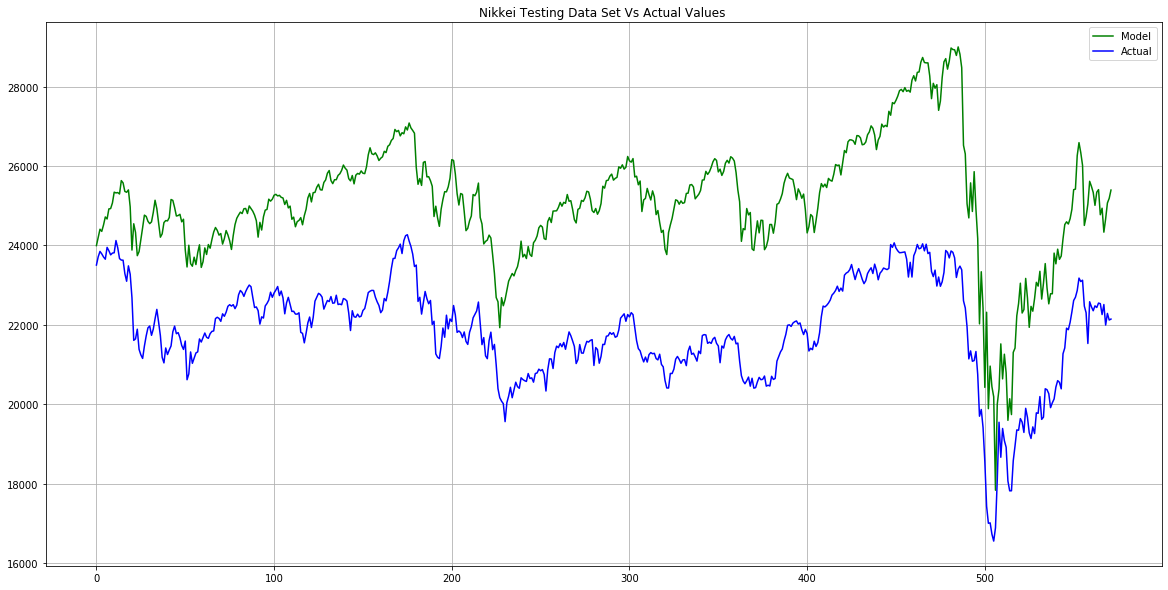

In [29]:
fig = plt.figure(figsize = (20,10))

plt.plot(predictions_test,'-g',label='Model')
plt.plot(y_test,'-b', label='Actual')

# Chart properties
plt.title('Nikkei Testing Data Set Vs Actual Values ')
# plt.ylabel('Yield level')
# plt.xlabel('Years')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
y_test.mean()

21872.59293706294

In [34]:
predictions_test.mean()

25103.35033256874

In [31]:
Training_Data_Set

SP500_Price  SP500_Return  20-day_Vol  50-day_Vol  100-day_Vol  \
0         1241.75     -0.007394   20.959995   19.480055    29.752237   
1         1266.00      0.019529   20.644222   19.577022    29.824555   
2         1295.00      0.022907   21.726881   20.070303    29.850770   
3         1281.25     -0.010618   22.107907   20.236138    29.805115   
4         1296.00      0.011512   22.273337   20.257133    29.824544   
...           ...           ...         ...         ...          ...   
4410      2688.00     -0.000558    6.823078    5.763436     6.410536   
4411      2687.25     -0.000651    6.228003    5.777269     6.409528   
4412      2687.50      0.000093    6.220832    5.778712     6.406824   
4413      2678.00     -0.003535    5.738021    5.867188     6.429570   
4414      2726.25      0.004884    6.063388    5.988264     6.106502   

        21-day_MA    55-day_MA  100-day_MA    Nikkei  Nikkei_Returns  ...  \
0     1209.547619  1166.518182   1109.5925  13415.89       -0.031280  ...   
1     1214.380952  1170.027273   1111.5025  13232.74       -0.013746  ...   
2     1219.357143  1174.004545   1113.4725  13468.46        0.017657  ...   
3     1223.166667  1177.631818   1115.1100  13536.56        0.005044  ...   
4     1227.976190  1181.509091   1116.9575  13391.81       -0.010751  ...   
...           ...          ...         ...       ...             ...  ...   
4410  2654.142857  2602.640909   2545.7875  22902.76        0.001602  ...   
4411  2662.285714  2607.854545   2550.1525  22911.21        0.000809  ...   
4412  2665.142857  2610.377273   2552.2725  22783.98       -0.005569  ...   
4413  2667.571429  2612.645455   2554.3450  22764.94       -0.000836  ...   
4414  2676.988095  2621.281818   2562.2400  23506.33        0.032048  ...   

      EM_High_Yield  EM Returns  EM_Bonds_20-day_Vol  EM_Bonds_50-day_Vol  \
0             14.90   -0.001340                  NaN                  NaN   
1             14.89   -0.000671                  NaN                  NaN   
2             14.79   -0.006716                  NaN                  NaN   
3             14.78   -0.000676                  NaN                  NaN   
4             14.82    0.002706                  NaN                  NaN   
...             ...         ...                  ...                  ...   
4410           5.70   -0.001751             8.234791             8.162444   
4411           5.67   -0.003515             8.128106             8.161718   
4412           5.67    0.000000             7.378105             8.149840   
4413           5.66   -0.001764             4.119414             8.117274   
4414           5.31   -0.005618            15.920061            12.617890   

      EM_Bonds_100-day_Vol  EM_Bonds_21-day_MA  EM_Bonds_55-day_MA  \
0                      NaN                 NaN                 NaN   
1                      NaN                 NaN                 NaN   
2                      NaN                 NaN                 NaN   
3                      NaN                 NaN                 NaN   
4                      NaN                 NaN                 NaN   
...                    ...                 ...                 ...   
4410              7.150068            5.688571            5.715273   
4411              7.107786            5.682381            5.714727   
4412              7.050873            5.680000            5.714545   
4413              7.022355            5.674762            5.714545   
4414              9.665944            5.620476            5.694727   

      EM_Bonds_100-day_MA  Value  Ted_Spread_Return  
0                     NaN    0.7           0.000000  
1                     NaN    0.7           0.000000  
2                     NaN    0.7           0.000000  
3                     NaN    0.7           0.000000  
4                     NaN    0.7           0.000000  
...                   ...    ...                ...  
4410               5.8084    0.4           0.333333  
4411              

In [32]:
Testing_Data_Set

Date  SP500_Price  SP500_Return  20-day_Vol  50-day_Vol  \
4414  2018-01-04      2726.25      0.004884    6.063388    5.988264   
4415  2018-01-05      2745.25      0.006969    6.312143    6.124989   
4416  2018-01-09      2755.00      0.002091    6.213577    6.028753   
4417  2018-01-10      2753.25     -0.000635    6.223482    5.932474   
4418  2018-01-11      2772.25      0.006901    6.492670    5.940355   
...          ...          ...           ...         ...         ...   
4981  2020-06-26      2996.75     -0.020830   28.416577   27.258865   
4982  2020-06-29      3037.75      0.013681   28.823689   26.642608   
4983  2020-06-30      3080.00      0.013908   29.139672   26.241794   
4984  2020-07-01      3092.75      0.004140   28.776369   25.409556   
4985  2020-07-02      3118.50      0.008326   28.915250   25.113428   

      100-day_Vol    21-day_MA    55-day_MA  100-day_MA    Nikkei  ...  \
4414     6.106502  2676.988095  2621.281818   2562.2400  23506.33  ...   
4415     6.029631  2682.452381  2624.700000   2565.0775  23714.53  ...   
4416     6.029425  2693.404762  2631.659091   2570.8475  23849.99  ...   
4417     5.424097  2698.130952  2634.909091   2574.1050  23788.20  ...   
4418     5.483271  2703.261905  2638.700000   2577.5800  23710.43  ...   
...           ...          ...          ...         ...       ...  ...   
4981    49.026207  3089.714286  2948.213636   2912.2775  22512.08  ...   
4982    49.045467  3090.000000  2953.036364   2909.3025  21995.04  ...   
4983    49.095461  3091.738095  2959.009091   2906.6475  22288.14  ...   
4984    49.092208  3093.035714  2963.690909   2904.3200  22121.73  ...   
4985    49.092458  3093.607143  2970.081818   2901.9750  22145.96  ...   

      EM_High_Yield  EM Returns  EM_Bonds_20-day_Vol  EM_Bonds_50-day_Vol  \
4414           5.31   -0.005618            15.920061            12.617890   
4415           5.29   -0.003766            15.477957            12.610370   
4416           5.30    0.001890            15.530664            12.634474   
4417           5.32    0.003774            15.632368            12.598164   
4418           5.31   -0.001880            15.596594            12.579030   
...             ...         ...                  ...                  ...   
4981           7.83    0.001279            23.611112            20.090238   
4982           7.86    0.003831            23.718372            19.625771   
4983           7.74   -0.015267            23.792253            19.210698   
4984           7.72   -0.002584            21.650907            19.223600   
4985           7.64   -0.010363            21.723292            18.917364   

      EM_Bonds_100-day_Vol  EM_Bonds_21-day_MA  EM_Bonds_55-day_MA  \
4414              9.665944            5.620476            5.694727   
4415              9.661870            5.604286            5.689091   
4416              9.660609            5.568095            5.676545   
4417              9.691933            5.551905            5.670727   
4418              9.654179            5.534762            5.664182   
...                    ...                 ...                 ...   
4981             48.020281            7.972857            9.064364   
4982             48.004380            7.934286            9.015273   
4983             48.068243            7.894286            8.967273   
4984             48.073920            7.859048            8.919818   
4985             48.109972            7.832381            8.873636   

      EM_Bonds_100-day_MA  Value  Ted_Spread_Return  
4414               5.7604    0.3                0.0  
4415               5.7525    0.3                0.0  
4416               5.7375    0.3                0.0  
4417               5.7303    0.3                0.0  
4418               5.7234    0.3                0.0  
...                   ...    ...                ...  
4981               9.0479    0.2                0.0  
4982               9.0654    0.2                0.0  
4983              